In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
from sklearn.preprocessing import MinMaxScaler

In [2]:
pwd

'C:\\Users\\Owner'

In [3]:
data = pd.read_csv(r"C:\\Users\\Owner\Desktop\nls_feb20.csv")
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2008-08-08,5.78,6.20,5.75,6.00,6.00,555300
1,2008-08-11,5.67,6.06,5.67,5.90,5.90,406100
2,2008-08-12,5.87,5.99,5.62,5.80,5.80,344500
3,2008-08-13,5.69,5.86,5.31,5.55,5.55,568600
4,2008-08-14,5.53,5.79,5.44,5.59,5.59,390400
...,...,...,...,...,...,...,...
2903,2020-02-21,3.79,3.81,3.33,3.47,3.47,612500
2904,2020-02-24,3.30,3.38,3.15,3.16,3.16,682700
2905,2020-02-25,3.80,4.00,3.12,3.31,3.31,1581900
2906,2020-02-26,3.40,3.45,3.15,3.15,3.15,660300


In [4]:
data_training = data[data['Date'] < '2019-10-31'].copy()
data_testing = data[data['Date'] >= '2019-10-31'].copy()

In [5]:
data_training = data_training.drop(['Date', 'Adj Close'], axis = 1)

In [6]:
data_training.shape

(2827, 5)

In [7]:
scaler = MinMaxScaler()
data_training = scaler.fit_transform(data_training)
data_training

array([[0.21842862, 0.23086369, 0.22203603, 0.22553018, 0.07805769],
       [0.21390373, 0.22513303, 0.21868454, 0.22145188, 0.05677441],
       [0.2221308 , 0.2222677 , 0.21658986, 0.21737357, 0.04798722],
       ...,
       [0.05676676, 0.06221858, 0.05655635, 0.05709625, 0.1487832 ],
       [0.05841217, 0.05648792, 0.05655635, 0.05628059, 0.07845711],
       [0.05676676, 0.05607859, 0.05236699, 0.05179445, 0.07757268]])

In [8]:
x_train = []
y_train = []

for i in range(100, data_training.shape[0]):
    x_train.append(data_training[i-100: i])
    y_train.append(data_training[i, 0])
    
x_train = np.array(x_train)
y_train = np.array(y_train)

In [9]:
x_train.shape

(2727, 100, 5)

In [10]:
from tensorflow.keras import Sequential 
from tensorflow.keras.layers import Dense, LSTM, Dropout

In [11]:
regressor = Sequential()

regressor.add(LSTM(units = 70, activation = 'relu', return_sequences = True, input_shape = (x_train.shape[1], 5)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 90, activation = 'relu', return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 100, activation = 'relu', return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 110, activation = 'relu'))
regressor.add(Dropout(0.2))

regressor.add(Dense(units = 1))

In [13]:
regressor.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 70)           21280     
_________________________________________________________________
dropout (Dropout)            (None, 100, 70)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 90)           57960     
_________________________________________________________________
dropout_1 (Dropout)          (None, 100, 90)           0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 100, 100)          76400     
_________________________________________________________________
dropout_2 (Dropout)          (None, 100, 100)          0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 110)               9

In [14]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')
regressor.fit(x_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
86/86 [==============================] - 25s 288ms/step - loss: 0.0152
Epoch 2/100
86/86 [==============================] - 26s 298ms/step - loss: 0.0038
Epoch 3/100
86/86 [==============================] - 31s 358ms/step - loss: 0.0032
Epoch 4/100
86/86 [==============================] - 35s 411ms/step - loss: 0.0037
Epoch 5/100
86/86 [==============================] - 32s 372ms/step - loss: 0.0029
Epoch 6/100
86/86 [==============================] - 30s 347ms/step - loss: 0.0027
Epoch 7/100
86/86 [==============================] - 29s 335ms/step - loss: 0.0028
Epoch 8/100
86/86 [==============================] - 29s 339ms/step - loss: 0.0027
Epoch 9/100
86/86 [==============================] - 30s 343ms/step - loss: 0.0024
Epoch 10/100
86/86 [==============================] - 29s 342ms/step - loss: 0.0026
Epoch 11/100
86/86 [==============================] - 29s 334ms/step - loss: 0.0023
Epoch 12/100
86/86 [==============================] - 28s 330ms/step - loss: 0.0020
E

In [15]:
data_testing.head()

,Date,Open,High,Low,Close,Adj Close,Volume
2827,2019-10-31,1.75,1.76,1.64,1.65,1.65,343500
2828,2019-11-01,1.65,1.80,1.64,1.70,1.70,479000
2829,2019-11-04,1.70,1.77,1.69,1.71,1.71,269800
2830,2019-11-05,1.70,1.74,1.65,1.68,1.68,438000
2831,2019-11-06,1.69,1.72,1.64,1.67,1.67,266400


In [16]:
past_60_days = data_testing.tail(60)

In [17]:
df = past_60_days.append(data_testing, ignore_index = True)
df = df.drop(['Date', 'Adj Close'], axis = 1)
df.head()

,Open,High,Low,Close,Volume
0,1.46,1.46,1.33,1.36,747200
1,1.37,1.44,1.32,1.43,689300
2,1.40,1.69,1.39,1.61,1468300
3,1.64,1.86,1.59,1.80,1205100
4,1.86,1.86,1.64,1.72,437300


In [18]:
inputs = scaler.transform(df)
inputs

array([[0.04072398, 0.03683995, 0.03686636, 0.0362969 , 0.10543208],
       [0.0370218 , 0.03602129, 0.03644742, 0.03915171, 0.09717269],
       [0.03825586, 0.0462546 , 0.03937997, 0.04649266, 0.20829648],
       [0.04812834, 0.05321326, 0.04775869, 0.05424144, 0.17075119],
       [0.05717811, 0.05321326, 0.04985337, 0.05097879, 0.06122507],
       [0.05183052, 0.05075727, 0.05236699, 0.05301794, 0.04513423],
       [0.05388729, 0.05648792, 0.05529954, 0.05954323, 0.14748509],
       [0.06005759, 0.06099059, 0.05571848, 0.06158238, 0.13983909],
       [0.06046894, 0.06017192, 0.05781315, 0.05668842, 0.07995492],
       [0.0555327 , 0.05485059, 0.05278592, 0.05220228, 0.08220878],
       [0.05306458, 0.04952927, 0.04859656, 0.04893964, 0.08397763],
       [0.0493624 , 0.0462546 , 0.04733976, 0.04893964, 0.09770049],
       [0.05059646, 0.05689726, 0.05152912, 0.05831974, 0.17577245],
       [0.05882353, 0.05525993, 0.05613741, 0.0550571 , 0.05720236],
       [0.05594405, 0.05198526, 0.

In [19]:
x_test = []
y_test = []

for i in range(60, inputs.shape[0]):
    x_test.append(inputs[i - 60: i])
    y_test.append(inputs[i, 0])

x_test = np.array(x_test)    
y_test = np.array(y_test)
x_test.shape, y_test.shape

((81, 60, 5), (81,))

In [20]:
x_test.shape

(81, 60, 5)

In [21]:
y_pred = regressor.predict(x_test)

In [22]:
scaler.scale_

array([4.11353336e-02, 4.09332788e-02, 4.18935903e-02, 4.07830343e-02,
       1.42649282e-07])

In [23]:
scale = 1 / 4.11353336e-02
scale

24.31000097687308

In [24]:
y_pred = y_pred * scale
y_test = y_test * scale

In [25]:
y_pred.shape

(81, 1)

In [26]:
y_test.shape

(81,)

In [48]:
y_pred[0:]

array([[3.2999868],
       [3.2986782],
       [3.2473862],
       [3.1455138],
       [3.0139139],
       [3.0037158],
       [3.0298636],
       [3.0695364],
       [3.0943885],
       [3.0973864],
       [3.0883625],
       [3.06961  ],
       [3.0586412],
       [3.061618 ],
       [3.0725906],
       [3.1483836],
       [3.2606552],
       [3.3348823],
       [3.4067988],
       [3.4025617]], dtype=float32)

In [27]:
y_test[0:]

array([1.28, 1.18, 1.23, 1.23, 1.22, 1.22, 1.05, 0.99, 1.12, 1.08, 1.03,
       1.03, 1.02, 1.02, 0.98, 1.  , 0.92, 0.96, 0.98, 0.92, 1.05, 0.99,
       0.9 , 0.93, 1.17, 1.39, 1.26, 1.31, 1.46, 1.47, 1.35, 1.29, 1.2 ,
       1.23, 1.43, 1.36, 1.26, 1.3 , 1.28, 1.18, 1.22, 1.2 , 1.33, 1.38,
       1.3 , 1.43, 1.69, 1.71, 2.24, 2.93, 3.  , 3.23, 3.32, 2.94, 3.02,
       3.03, 3.52, 3.14, 2.96, 2.98, 3.13, 3.02, 2.73, 2.67, 2.28, 2.53,
       2.9 , 2.71, 2.7 , 2.43, 2.48, 2.43, 2.43, 2.53, 2.56, 2.58, 3.32,
       2.83, 3.33, 2.93, 2.68])

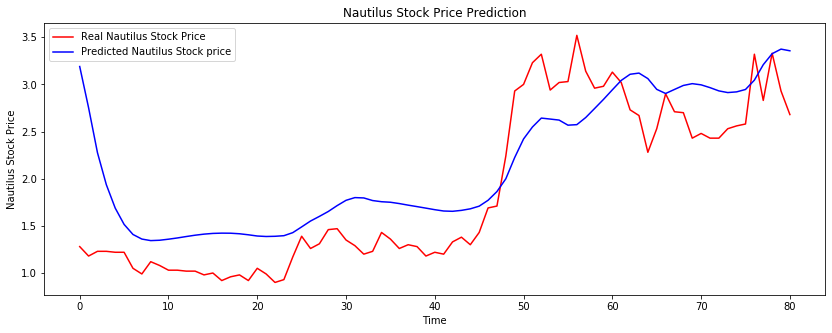

In [28]:
plt.figure(figsize = (14,5))
plt.plot(y_test, color = 'red', label = 'Real Nautilus Stock Price')
plt.plot(y_pred, color = 'blue', label = 'Predicted Nautilus Stock price')
plt.title('Nautilus Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Nautilus Stock Price')
plt.legend()
plt.show() 